<a href="https://colab.research.google.com/github/linson13/MY-PROJECTS/blob/Machine-Learning-And-Artificial-Intelligence-Algorithms/Neural_Network_Training_on_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6834 - loss: 0.5701 - val_accuracy: 0.8814 - val_loss: 0.2938
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9278 - loss: 0.2011 - val_accuracy: 0.8786 - val_loss: 0.3123
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9545 - loss: 0.1325 - val_accuracy: 0.8731 - val_loss: 0.3509
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9706 - loss: 0.0950 - val_accuracy: 0.8678 - val_loss: 0.4136
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9842 - loss: 0.0611 - val_accuracy: 0.8620 - val_loss: 0.5045
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9918 - loss: 0.0375 - val_accuracy: 0.8598 - val_loss: 0.5932
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9955 - loss: 0.0224 - val_accuracy: 0.8566 - val_loss: 0.6889
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9976 - loss: 0.0145 - val_accuracy: 0.8580 - v

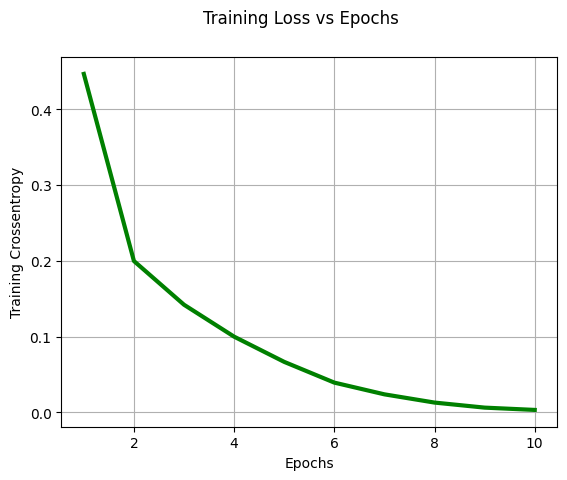

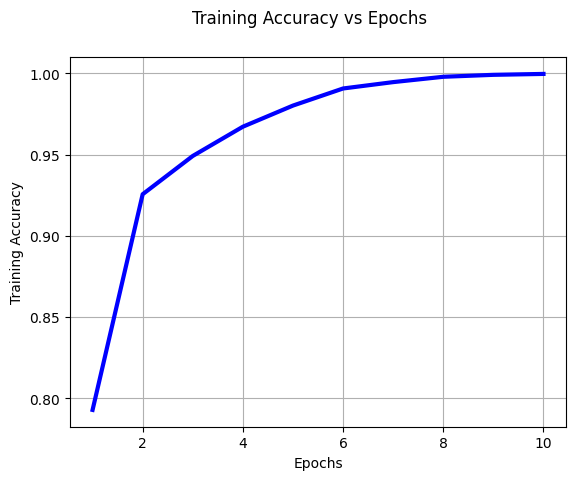

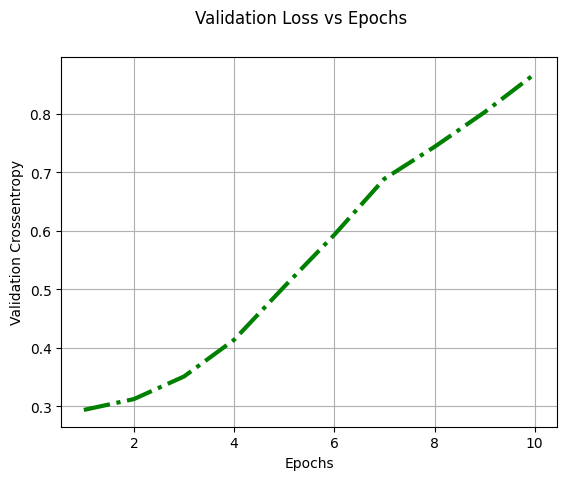

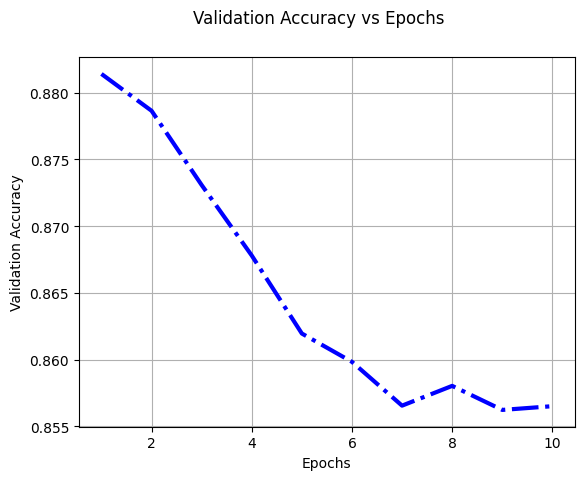

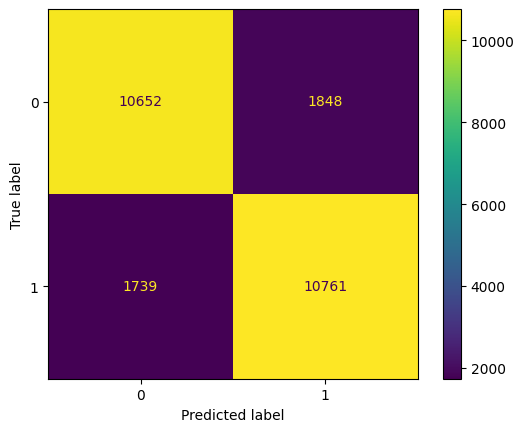

In [2]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=10000)


def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        results[i, sequences[i]] = 1.0
    return results

Xtrain = vectorize(Xtrain)



model=Sequential()
model.add(Dense(50, activation="relu", input_shape=(10000,)))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1, activation="sigmoid"))




model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


history = model.fit(Xtrain, ytrain, epochs=10, batch_size=550, validation_data=(vectorize(Xtest), ytest))


Xtest = vectorize(Xtest)
ypred = model.predict(Xtest)
ypred = np.round(ypred)


score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()
